In [156]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [157]:
caminho_shapefile = "BR_Municipios_2023/BR_Municipios_2023.shp"

mapa = gpd.read_file(caminho_shapefile)

In [158]:
df_sim = pd.read_csv('mydataSIM.csv')
df_sinasc = pd.read_csv('mydataSINASC.csv')

In [159]:
pd.set_option('display.max_columns', None)

### Agrupamento dos dados do SIM por municípios

In [161]:
df_sim.head(1)

,TIPOBITO,DTOBITO,HORAOBITO,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,PESO,ASSISTMED,LINHAII,CAUSABAS,DTRECORIGA,ESCMAEAGR1,DIFDATA,SEXO_NOME,RACA_NOME,DTNASC_teste,DTOBITO_teste,DIAS_VIDA,CIDADE_OBITO,UF,REGIAO,SEMAGESTAC_CORRIGIDA_COMBINADA,LOCOCOR_NOME,MES_OBITO,ESCOLARIDADE_MAE
0,2,1012023,2150.0,350400.0,17122022.0,215,1,1.0,352090,1,2083094.0,350400,NaN,9.0,9.0,NaN,0.0,1.0,2.0,1.0,2.0,1742.0,NaN,NaN,Q248,4012023,9.0,66,Masculino,Branca,2022-12-17,2023-01-01,15.0,Assis,SP,Sudeste,32.0,Hospital,1,Ignorado


In [162]:
df_mun = df_sim.groupby('CODMUNOCOR').agg(
    total_obito=('TIPOBITO', 'count'),

    obito_hospital=('LOCOCOR', lambda x: (x == 1).sum()),
    obito_estab_saude=('LOCOCOR', lambda x: (x == 2).sum()),
    obito_domicilio=('LOCOCOR', lambda x: (x == 3).sum()),

    sim_media_peso =('PESO', 'mean'),
).reset_index()

In [163]:
df_mun

,CODMUNOCOR,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso
0,110002,13,13,0,0,2089.846154
1,110004,4,4,0,0,2174.250000
2,110010,5,3,0,1,2431.250000
3,110012,26,25,1,0,1891.480000
4,110015,13,13,0,0,1910.166667
...,...,...,...,...,...,...
1446,522060,1,0,0,1,2730.000000
1447,522140,2,1,0,0,2700.000000
1448,522160,33,33,0,0,1283.031250
1449,522185,1,1,0,0,2500.000000


### Agrupamento dos dados do SINASC por municípios

In [165]:
df_sinasc.head(1)

,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,CODANOMAL,OPORT_DN,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,STDNEPIDEM,STDNNOVA,TPROBSON,KOTELCHUCK,nome_cidade_nasc
0,2679477.0,110001,1,32.0,2.0,4.0,999992.0,3.0,2.0,110001,5.0,1.0,1.0,4.0,2023-01-02,534.0,2,8.0,9.0,4.0,3265.0,2.0,NaN,58,500660.0,50.0,3.0,3.0,4.0,4.0,3.0,0.0,2022-04-01,39.0,8.0,11.0,1.0,1.0,2.0,3.0,1.0,0.0,1,3,5,Alta Floresta D'Oeste


In [166]:
df_mun2 = df_sinasc.groupby('CODMUNNASC').agg(
    total_nascimento=('LOCNASC', 'count'),

    nascimento_hospital=('LOCNASC', lambda x: (x == 1).sum()),
    nascimento_estab_saude=('LOCNASC', lambda x: (x == 2).sum()),
    nascimento_domicilio=('LOCNASC', lambda x: (x == 3).sum()),

    media_consultas=('CONSPRENAT', 'mean'),
    sinasc_media_peso =('PESO', 'mean'),

    kotelchuck_1=('KOTELCHUCK', lambda x: (x == 1).sum()),
    kotelchuck_2=('KOTELCHUCK', lambda x: (x == 2).sum()),
    kotelchuck_3=('KOTELCHUCK', lambda x: (x == 3).sum()),
    kotelchuck_4=('KOTELCHUCK', lambda x: (x == 4).sum()),
    kotelchuck_5=('KOTELCHUCK', lambda x: (x == 5).sum())
).reset_index()

In [167]:
df_mun2

,CODMUNNASC,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5
0,110001,35,35,0,0,8.200000,3209.000000,0,5,4,2,23
1,110002,2259,2255,2,0,8.689243,3219.460381,1,322,93,154,1687
2,110004,1883,1864,18,1,9.102509,3206.366968,0,184,93,119,1464
3,110005,129,128,0,0,8.914729,3358.124031,0,15,1,3,110
4,110006,5,2,0,0,10.000000,3176.000000,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3817,522190,1,0,1,0,4.000000,3200.000000,0,1,0,0,0
3818,522200,117,117,0,0,8.000000,3178.777778,2,4,5,11,95
3819,522205,87,87,0,0,8.402299,3174.850575,0,1,4,7,74
3820,522220,2,1,0,0,7.500000,3462.500000,0,2,0,0,0


### Agrupamento dos dados do SIM e SINASC por municípios

In [169]:
df_sinasc["CODMUNOCOR"] = df_sinasc["CODMUNNASC"]

In [170]:
df = pd.concat([df_sinasc, df_sim], axis=0, ignore_index=True)

In [171]:
common_columns = {
    'QTDFILMORT', 'GRAVIDEZ', 'QTDFILVIVO', 'DTNASC', 'SEXO', 'CODMUNRES',
    'CODESTAB', 'ESCMAE',  'IDADEMAE', 'CODMUNOCOR', 'PARTO',
    'ESCMAE2010', 'CODMUNNATU', 'RACACOR', 'PESO', 'GESTACAO', 'CODESTAB'
}

df = df[list(common_columns)]

In [172]:
df

,CODESTAB,CODMUNOCOR,CODMUNRES,ESCMAE,GRAVIDEZ,PARTO,PESO,DTNASC,ESCMAE2010,QTDFILVIVO,RACACOR,GESTACAO,QTDFILMORT,CODMUNNATU,SEXO,IDADEMAE
0,2679477.0,110001,110001,4.0,1.0,1.0,3265.0,2023-01-02,3.0,3.0,4.0,5.0,2.0,500660.0,2,32.0
1,2679477.0,110001,110001,4.0,1.0,1.0,3075.0,2023-01-25,3.0,1.0,5.0,4.0,0.0,110005.0,1,18.0
2,2679477.0,110001,110001,3.0,1.0,1.0,1700.0,2023-02-10,2.0,0.0,1.0,3.0,0.0,110001.0,1,15.0
3,2516500.0,110001,110001,3.0,1.0,2.0,3784.0,2023-01-18,2.0,1.0,4.0,5.0,0.0,110002.0,1,32.0
4,2516500.0,110001,110001,5.0,1.0,2.0,3394.0,2023-01-18,5.0,0.0,4.0,5.0,0.0,110001.0,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560907,7488289.0,150613,150276,NaN,NaN,NaN,NaN,4092023.0,NaN,NaN,5.0,NaN,NaN,150276.0,1,NaN
2560908,494402.0,150510,150510,1.0,1.0,1.0,2100.0,19092023.0,0.0,4.0,5.0,1.0,0.0,150510.0,1,NaN
2560909,NaN,130140,130140,1.0,1.0,1.0,2500.0,27102023.0,0.0,3.0,5.0,5.0,0.0,130140.0,1,19.0
2560910,NaN,130140,130140,1.0,1.0,1.0,320.0,4112023.0,0.0,6.0,5.0,1.0,2.0,130140.0,2,30.0


In [173]:
df_mun3 = df.groupby('CODMUNOCOR').agg(
    qtd_filho_morto =('QTDFILMORT', 'mean'),
    qtd_filho_vivo = ('QTDFILVIVO', 'mean'),

    sexo_masculino = ('SEXO', lambda x: (x == 1).sum()),
    sexo_feminino = ('SEXO', lambda x: (x == 2).sum()),
    
    gravidez_unica = ('GRAVIDEZ', lambda x: (x == 1).sum()),
    gravidez_dupla = ('GRAVIDEZ', lambda x: (x == 2).sum()),
    gravidez_tripla = ('GRAVIDEZ', lambda x: (x == 3).sum()),

    esc_0=('ESCMAE2010', lambda x: (x == 0).sum()),
    esc_1=('ESCMAE2010', lambda x: (x == 1).sum()),
    esc_2=('ESCMAE2010', lambda x: (x == 2).sum()),
    esc_3=('ESCMAE2010', lambda x: (x == 3).sum()),
    esc_4=('ESCMAE2010', lambda x: (x == 4).sum()),
    esc_5=('ESCMAE2010', lambda x: (x == 5).sum()),

    parto_vaginal=('PARTO', lambda x: (x == 1).sum()),
    parto_cesario=('PARTO', lambda x: (x == 2).sum()),

    raca_branca = ('RACACOR', lambda x: (x == 1).sum()),
    raca_preta = ('RACACOR', lambda x: (x == 2).sum()),
    raca_amarela = ('RACACOR', lambda x: (x == 3).sum()),
    raca_parda = ('RACACOR', lambda x: (x == 4).sum()),
    raca_indigena = ('RACACOR', lambda x: (x == 5).sum()),

    idade_mae = ('IDADEMAE', 'mean'),

    num_estabelecimentos=('CODESTAB', 'nunique'),

).reset_index()

In [174]:
df_mun3

,CODMUNOCOR,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos
0,110001,0.228571,1.114286,27,8,35,0,0,0,2,6,18,3,5,10,25,7,0,0,22,5,26.657143,2
1,110002,0.253521,0.919454,1193,1079,2231,41,0,2,47,457,1178,149,439,619,1653,548,150,27,1542,2,26.423415,8
2,110004,0.242713,0.837838,974,913,1858,29,0,4,49,292,829,142,571,385,1501,594,106,10,1089,85,27.403816,5
3,110005,0.294574,1.100775,74,55,129,0,0,0,1,24,74,5,25,8,121,52,5,0,70,0,26.232558,1
4,110006,0.000000,1.400000,3,2,5,0,0,0,0,1,4,0,0,5,0,0,1,0,3,0,24.200000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,522190,0.000000,2.000000,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,20.000000,1
3847,522200,0.247863,1.136752,58,59,117,0,0,0,3,23,66,6,19,63,54,30,3,0,84,0,27.341880,3
3848,522205,0.540230,1.126437,49,38,86,0,0,0,1,25,51,3,5,15,72,23,2,0,62,0,23.471264,1
3849,522220,0.500000,1.500000,1,1,2,0,0,0,0,1,1,0,0,2,0,1,0,0,1,0,20.000000,1


In [175]:
# Primeiro, alinhar os nomes das colunas chave
df_nasc = df_mun2.rename(columns={'CODMUNNASC': 'CODMUN'})

# Padronizar também os outros se necessário
df_obito = df_mun.rename(columns={'CODMUNOCOR': 'CODMUN'})
df_obito_infantil = df_mun3.rename(columns={'CODMUNOCOR': 'CODMUN'})

# Realizar os merges
df_merged = df_obito.merge(df_obito_infantil, on='CODMUN', how='outer')
df_merged = df_merged.merge(df_nasc, on='CODMUN', how='outer')

# Verificar resultado
df_merged.head()


,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5
0,110001,NaN,NaN,NaN,NaN,NaN,0.228571,1.114286,27,8,35,0,0,0,2,6,18,3,5,10,25,7,0,0,22,5,26.657143,2,35.0,35.0,0.0,0.0,8.200000,3209.000000,0.0,5.0,4.0,2.0,23.0
1,110002,13.0,13.0,0.0,0.0,2089.846154,0.253521,0.919454,1193,1079,2231,41,0,2,47,457,1178,149,439,619,1653,548,150,27,1542,2,26.423415,8,2259.0,2255.0,2.0,0.0,8.689243,3219.460381,1.0,322.0,93.0,154.0,1687.0
2,110004,4.0,4.0,0.0,0.0,2174.250000,0.242713,0.837838,974,913,1858,29,0,4,49,292,829,142,571,385,1501,594,106,10,1089,85,27.403816,5,1883.0,1864.0,18.0,1.0,9.102509,3206.366968,0.0,184.0,93.0,119.0,1464.0
3,110005,NaN,NaN,NaN,NaN,NaN,0.294574,1.100775,74,55,129,0,0,0,1,24,74,5,25,8,121,52,5,0,70,0,26.232558,1,129.0,128.0,0.0,0.0,8.914729,3358.124031,0.0,15.0,1.0,3.0,110.0
4,110006,NaN,NaN,NaN,NaN,NaN,0.000000,1.400000,3,2,5,0,0,0,0,1,4,0,0,5,0,0,1,0,3,0,24.200000,1,5.0,2.0,0.0,0.0,10.000000,3176.000000,0.0,1.0,0.0,0.0,4.0


In [176]:
# Lista de colunas que são contagens
colunas_contagem = [
    'total_obito', 'obito_hospital', 'obito_estab_saude', 'obito_domicilio',
    'sexo_masculino', 'sexo_feminino',
    'gravidez_unica', 'gravidez_dupla', 'gravidez_tripla',
    'esc_0', 'esc_1', 'esc_2', 'esc_3', 'esc_4', 'esc_5',
    'parto_vaginal', 'parto_cesario',
    'raca_branca', 'raca_preta', 'raca_amarela', 'raca_parda', 'raca_indigena',
    'num_estabelecimentos',
    'total_nascimento', 'nascimento_hospital', 'nascimento_estab_saude', 'nascimento_domicilio',
    'kotelchuck_1', 'kotelchuck_2', 'kotelchuck_3', 'kotelchuck_4', 'kotelchuck_5'
]

# Preencher NaN com zero nessas colunas
df_merged[colunas_contagem] = df_merged[colunas_contagem].fillna(0)


In [177]:
df_merged

,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5
0,110001,0.0,0.0,0.0,0.0,NaN,0.228571,1.114286,27,8,35,0,0,0,2,6,18,3,5,10,25,7,0,0,22,5,26.657143,2,35.0,35.0,0.0,0.0,8.200000,3209.000000,0.0,5.0,4.0,2.0,23.0
1,110002,13.0,13.0,0.0,0.0,2089.846154,0.253521,0.919454,1193,1079,2231,41,0,2,47,457,1178,149,439,619,1653,548,150,27,1542,2,26.423415,8,2259.0,2255.0,2.0,0.0,8.689243,3219.460381,1.0,322.0,93.0,154.0,1687.0
2,110004,4.0,4.0,0.0,0.0,2174.250000,0.242713,0.837838,974,913,1858,29,0,4,49,292,829,142,571,385,1501,594,106,10,1089,85,27.403816,5,1883.0,1864.0,18.0,1.0,9.102509,3206.366968,0.0,184.0,93.0,119.0,1464.0
3,110005,0.0,0.0,0.0,0.0,NaN,0.294574,1.100775,74,55,129,0,0,0,1,24,74,5,25,8,121,52,5,0,70,0,26.232558,1,129.0,128.0,0.0,0.0,8.914729,3358.124031,0.0,15.0,1.0,3.0,110.0
4,110006,0.0,0.0,0.0,0.0,NaN,0.000000,1.400000,3,2,5,0,0,0,0,1,4,0,0,5,0,0,1,0,3,0,24.200000,1,5.0,2.0,0.0,0.0,10.000000,3176.000000,0.0,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,522190,0.0,0.0,0.0,0.0,NaN,0.000000,2.000000,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,20.000000,1,1.0,0.0,1.0,0.0,4.000000,3200.000000,0.0,1.0,0.0,0.0,0.0
3847,522200,0.0,0.0,0.0,0.0,NaN,0.247863,1.136752,58,59,117,0,0,0,3,23,66,6,19,63,54,30,3,0,84,0,27.341880,3,117.0,117.0,0.0,0.0,8.000000,3178.777778,2.0,4.0,5.0,11.0,95.0
3848,522205,0.0,0.0,0.0,0.0,NaN,0.540230,1.126437,49,38,86,0,0,0,1,25,51,3,5,15,72,23,2,0,62,0,23.471264,1,87.0,87.0,0.0,0.0,8.402299,3174.850575,0.0,1.0,4.0,7.0,74.0
3849,522220,0.0,0.0,0.0,0.0,NaN,0.500000,1.500000,1,1,2,0,0,0,0,1,1,0,0,2,0,1,0,0,1,0,20.000000,1,2.0,1.0,0.0,0.0,7.500000,3462.500000,0.0,2.0,0.0,0.0,0.0


In [178]:
df = df_merged.copy()

### DF pronto com dados dos municípios

In [180]:
df

,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5
0,110001,0.0,0.0,0.0,0.0,NaN,0.228571,1.114286,27,8,35,0,0,0,2,6,18,3,5,10,25,7,0,0,22,5,26.657143,2,35.0,35.0,0.0,0.0,8.200000,3209.000000,0.0,5.0,4.0,2.0,23.0
1,110002,13.0,13.0,0.0,0.0,2089.846154,0.253521,0.919454,1193,1079,2231,41,0,2,47,457,1178,149,439,619,1653,548,150,27,1542,2,26.423415,8,2259.0,2255.0,2.0,0.0,8.689243,3219.460381,1.0,322.0,93.0,154.0,1687.0
2,110004,4.0,4.0,0.0,0.0,2174.250000,0.242713,0.837838,974,913,1858,29,0,4,49,292,829,142,571,385,1501,594,106,10,1089,85,27.403816,5,1883.0,1864.0,18.0,1.0,9.102509,3206.366968,0.0,184.0,93.0,119.0,1464.0
3,110005,0.0,0.0,0.0,0.0,NaN,0.294574,1.100775,74,55,129,0,0,0,1,24,74,5,25,8,121,52,5,0,70,0,26.232558,1,129.0,128.0,0.0,0.0,8.914729,3358.124031,0.0,15.0,1.0,3.0,110.0
4,110006,0.0,0.0,0.0,0.0,NaN,0.000000,1.400000,3,2,5,0,0,0,0,1,4,0,0,5,0,0,1,0,3,0,24.200000,1,5.0,2.0,0.0,0.0,10.000000,3176.000000,0.0,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,522190,0.0,0.0,0.0,0.0,NaN,0.000000,2.000000,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,20.000000,1,1.0,0.0,1.0,0.0,4.000000,3200.000000,0.0,1.0,0.0,0.0,0.0
3847,522200,0.0,0.0,0.0,0.0,NaN,0.247863,1.136752,58,59,117,0,0,0,3,23,66,6,19,63,54,30,3,0,84,0,27.341880,3,117.0,117.0,0.0,0.0,8.000000,3178.777778,2.0,4.0,5.0,11.0,95.0
3848,522205,0.0,0.0,0.0,0.0,NaN,0.540230,1.126437,49,38,86,0,0,0,1,25,51,3,5,15,72,23,2,0,62,0,23.471264,1,87.0,87.0,0.0,0.0,8.402299,3174.850575,0.0,1.0,4.0,7.0,74.0
3849,522220,0.0,0.0,0.0,0.0,NaN,0.500000,1.500000,1,1,2,0,0,0,0,1,1,0,0,2,0,1,0,0,1,0,20.000000,1,2.0,1.0,0.0,0.0,7.500000,3462.500000,0.0,2.0,0.0,0.0,0.0


### DF dado em frações por município

In [182]:
df_frac = df_merged.copy()

In [183]:
# Frações dos óbitos
df_frac['obito_hospital'] = df_frac['obito_hospital'] / df_frac['total_obito'] 
df_frac['obito_estab_saude'] = df_frac['obito_estab_saude'] / df_frac['total_obito'] 
df_frac['obito_domicilio'] = df_frac['obito_domicilio'] / df_frac['total_obito'] 

# Frações dos nascimentos
df_frac['nascimento_hospital'] = df_frac['nascimento_hospital'] / df_frac['total_nascimento']
df_frac['nascimento_estab_saude'] = df_frac['nascimento_estab_saude'] / df_frac['total_nascimento']
df_frac['nascimento_domicilio'] = df_frac['nascimento_domicilio'] / df_frac['total_nascimento']

# Frações do Kotelchuck
df_frac['kotelchuck_1'] = df_frac['kotelchuck_1'] / df_frac['total_nascimento']
df_frac['kotelchuck_2'] = df_frac['kotelchuck_2'] / df_frac['total_nascimento']
df_frac['kotelchuck_3'] = df_frac['kotelchuck_3'] / df_frac['total_nascimento']
df_frac['kotelchuck_4'] = df_frac['kotelchuck_4'] / df_frac['total_nascimento']
df_frac['kotelchuck_5'] = df_frac['kotelchuck_5'] / df_frac['total_nascimento']

# Total geral
df_frac['total_geral'] = df_frac['total_nascimento'] + df_frac['total_obito']

# Frações de sexo
df_frac['sexo_masculino'] = df_frac['sexo_masculino'] / df_frac['total_geral']
df_frac['sexo_feminino'] = df_frac['sexo_feminino'] / df_frac['total_geral']

# Frações de gravidez
df_frac['gravidez_unica'] = df_frac['gravidez_unica'] / df_frac['total_geral']
df_frac['gravidez_dupla'] = df_frac['gravidez_dupla'] / df_frac['total_geral']
df_frac['gravidez_tripla'] = df_frac['gravidez_tripla'] / df_frac['total_geral']

# Frações de escolaridade
df_frac['esc_0'] = df_frac['esc_0'] / df_frac['total_geral']
df_frac['esc_1'] = df_frac['esc_1'] / df_frac['total_geral']
df_frac['esc_2'] = df_frac['esc_2'] / df_frac['total_geral']
df_frac['esc_3'] = df_frac['esc_3'] / df_frac['total_geral']
df_frac['esc_4'] = df_frac['esc_4'] / df_frac['total_geral']
df_frac['esc_5'] = df_frac['esc_5'] / df_frac['total_geral']

# Frações do tipo de parto
df_frac['parto_vaginal'] = df_frac['parto_vaginal'] / df_frac['total_geral']
df_frac['parto_cesario'] = df_frac['parto_cesario'] / df_frac['total_geral']

# Frações de raça/cor
df_frac['raca_branca'] = df_frac['raca_branca'] / df_frac['total_geral']
df_frac['raca_preta'] = df_frac['raca_preta'] / df_frac['total_geral']
df_frac['raca_amarela'] = df_frac['raca_amarela'] / df_frac['total_geral']
df_frac['raca_parda'] = df_frac['raca_parda'] / df_frac['total_geral']
df_frac['raca_indigena'] = df_frac['raca_indigena'] / df_frac['total_geral']


In [184]:
df_frac

,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5,total_geral
0,110001,0.0,NaN,NaN,NaN,NaN,0.228571,1.114286,0.771429,0.228571,1.000000,0.000000,0.000000,0.000000,0.057143,0.171429,0.514286,0.085714,0.142857,0.285714,0.714286,0.200000,0.000000,0.000000,0.628571,0.142857,26.657143,2,35.0,1.000000,0.000000,0.000000,8.200000,3209.000000,0.000000,0.142857,0.114286,0.057143,0.657143,35.0
1,110002,13.0,1.000000,0.00000,0.000000,2089.846154,0.253521,0.919454,0.525088,0.474912,0.981954,0.018046,0.000000,0.000880,0.020687,0.201144,0.518486,0.065581,0.193222,0.272447,0.727553,0.241197,0.066021,0.011884,0.678697,0.000880,26.423415,8,2259.0,0.998229,0.000885,0.000000,8.689243,3219.460381,0.000443,0.142541,0.041169,0.068172,0.746791,2272.0
2,110004,4.0,1.000000,0.00000,0.000000,2174.250000,0.242713,0.837838,0.516163,0.483837,0.984632,0.015368,0.000000,0.002120,0.025967,0.154743,0.439322,0.075252,0.302597,0.204028,0.795443,0.314785,0.056174,0.005299,0.577107,0.045045,27.403816,5,1883.0,0.989910,0.009559,0.000531,9.102509,3206.366968,0.000000,0.097716,0.049389,0.063197,0.777483,1887.0
3,110005,0.0,NaN,NaN,NaN,NaN,0.294574,1.100775,0.573643,0.426357,1.000000,0.000000,0.000000,0.000000,0.007752,0.186047,0.573643,0.038760,0.193798,0.062016,0.937984,0.403101,0.038760,0.000000,0.542636,0.000000,26.232558,1,129.0,0.992248,0.000000,0.000000,8.914729,3358.124031,0.000000,0.116279,0.007752,0.023256,0.852713,129.0
4,110006,0.0,NaN,NaN,NaN,NaN,0.000000,1.400000,0.600000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.200000,0.000000,0.600000,0.000000,24.200000,1,5.0,0.400000,0.000000,0.000000,10.000000,3176.000000,0.000000,0.200000,0.000000,0.000000,0.800000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,522190,0.0,NaN,NaN,NaN,NaN,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1,1.0,0.000000,1.000000,0.000000,4.000000,3200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
3847,522200,0.0,NaN,NaN,NaN,NaN,0.247863,1.136752,0.495726,0.504274,1.000000,0.000000,0.000000,0.000000,0.025641,0.196581,0.564103,0.051282,0.162393,0.538462,0.461538,0.256410,0.025641,0.000000,0.717949,0.000000,27.341880,3,117.0,1.000000,0.000000,0.000000,8.000000,3178.777778,0.017094,0.034188,0.042735,0.094017,0.811966,117.0
3848,522205,0.0,NaN,NaN,NaN,NaN,0.540230,1.126437,0.563218,0.436782,0.988506,0.000000,0.000000,0.000000,0.011494,0.287356,0.586207,0.034483,0.057471,0.172414,0.827586,0.264368,0.022989,0.000000,0.712644,0.000000,23.471264,1,87.0,1.000000,0.000000,0.000000,8.402299,3174.850575,0.000000,0.011494,0.045977,0.080460,0.850575,87.0
3849,522220,0.0,NaN,NaN,NaN,NaN,0.500000,1.500000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,20.000000,1,2.0,0.500000,0.000000,0.000000,7.500000,3462.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0


In [185]:
df_frac.isna().sum()

CODMUN                       0
total_obito                  0
obito_hospital            2400
obito_estab_saude         2400
obito_domicilio           2400
sim_media_peso            2515
qtd_filho_morto             56
qtd_filho_vivo              53
sexo_masculino               0
sexo_feminino                0
gravidez_unica               0
gravidez_dupla               0
gravidez_tripla              0
esc_0                        0
esc_1                        0
esc_2                        0
esc_3                        0
esc_4                        0
esc_5                        0
parto_vaginal                0
parto_cesario                0
raca_branca                  0
raca_preta                   0
raca_amarela                 0
raca_parda                   0
raca_indigena                0
idade_mae                   11
num_estabelecimentos         0
total_nascimento             0
nascimento_hospital         29
nascimento_estab_saude      29
nascimento_domicilio        29
media_co

In [186]:
colunas_frac = [
    'obito_hospital', 'obito_estab_saude', 'obito_domicilio',
    'nascimento_hospital', 'nascimento_estab_saude', 'nascimento_domicilio',
    'kotelchuck_1', 'kotelchuck_2', 'kotelchuck_3', 'kotelchuck_4', 'kotelchuck_5',
    'sexo_masculino', 'sexo_feminino',
    'gravidez_unica', 'gravidez_dupla', 'gravidez_tripla',
    'esc_0', 'esc_1', 'esc_2', 'esc_3', 'esc_4', 'esc_5',
    'parto_vaginal', 'parto_cesario',
    'raca_branca', 'raca_preta', 'raca_amarela', 'raca_parda', 'raca_indigena'
]

df_frac[colunas_frac] = df_frac[colunas_frac].fillna(0)


In [187]:
df_frac.isna().sum()

CODMUN                       0
total_obito                  0
obito_hospital               0
obito_estab_saude            0
obito_domicilio              0
sim_media_peso            2515
qtd_filho_morto             56
qtd_filho_vivo              53
sexo_masculino               0
sexo_feminino                0
gravidez_unica               0
gravidez_dupla               0
gravidez_tripla              0
esc_0                        0
esc_1                        0
esc_2                        0
esc_3                        0
esc_4                        0
esc_5                        0
parto_vaginal                0
parto_cesario                0
raca_branca                  0
raca_preta                   0
raca_amarela                 0
raca_parda                   0
raca_indigena                0
idade_mae                   11
num_estabelecimentos         0
total_nascimento             0
nascimento_hospital          0
nascimento_estab_saude       0
nascimento_domicilio         0
media_co

### Estado de São Paulo

In [189]:
df_sp = df[df['CODMUN'].astype(str).str[:2] == '35']

In [190]:
df_sp

,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5
2443,350010,2.0,2.0,0.0,0.0,2172.500000,0.251273,0.840407,277,312,587,2,0,0,3,44,359,23,160,92,497,370,12,2,204,0,28.161290,1,587.0,587.0,0.0,0.0,9.936968,3239.398637,0.0,76.0,13.0,10.0,487.0
2444,350030,0.0,0.0,0.0,0.0,NaN,0.666667,1.333333,3,0,3,0,0,0,0,2,0,0,1,3,0,2,1,0,0,0,30.000000,0,3.0,0.0,0.0,1.0,9.000000,3178.333333,0.0,0.0,0.0,0.0,3.0
2445,350050,0.0,0.0,0.0,0.0,NaN,0.241935,0.887097,135,115,248,2,0,1,6,42,151,12,34,69,181,233,0,0,10,0,28.100000,1,250.0,250.0,0.0,0.0,9.489879,3175.708000,0.0,22.0,3.0,8.0,210.0
2446,350070,0.0,0.0,0.0,0.0,NaN,0.270548,1.215753,151,141,291,1,0,1,2,49,211,9,20,101,191,156,32,0,103,0,26.886986,1,292.0,291.0,1.0,0.0,8.205479,3189.195205,0.0,81.0,8.0,14.0,183.0
2447,350100,0.0,0.0,0.0,0.0,NaN,0.200000,1.400000,7,3,10,0,0,0,0,2,8,0,0,10,0,6,0,0,4,0,24.200000,1,10.0,9.0,0.0,1.0,10.000000,3072.000000,0.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,355670,3.0,3.0,0.0,0.0,2246.666667,0.294118,1.000000,236,206,440,2,0,1,6,62,320,16,37,115,327,195,48,0,196,1,28.090498,1,439.0,437.0,0.0,2.0,10.441648,3228.480638,1.0,56.0,4.0,15.0,360.0
2847,355690,0.0,0.0,0.0,0.0,NaN,0.000000,2.000000,1,1,2,0,0,0,0,1,1,0,0,2,0,2,0,0,0,0,25.000000,1,2.0,1.0,1.0,0.0,7.000000,3002.500000,0.0,0.0,0.0,0.0,1.0
2848,355700,1.0,1.0,0.0,0.0,2106.000000,0.266413,1.222645,562,489,1051,0,0,5,16,139,818,24,49,586,465,700,59,3,286,3,26.542341,1,1050.0,1043.0,1.0,4.0,10.217557,3213.429524,5.0,112.0,27.0,26.0,875.0
2849,355710,18.0,17.0,0.0,0.0,677.777778,0.264403,0.918724,1012,931,1870,74,0,0,17,254,1177,57,439,265,1679,1219,112,5,608,0,28.078189,2,1926.0,1924.0,1.0,1.0,10.806234,3113.462098,2.0,177.0,49.0,32.0,1664.0


In [191]:
mapa['CD_MUN'] = mapa['CD_MUN'].astype(str).str[:6]
df_sp = df_sp.copy()
df_sp['CODMUN'] = df_sp['CODMUN'].astype(str).str[:6]
gdf_sp = mapa.merge(df_sp, left_on='CD_MUN', right_on='CODMUN', how='left')

### Todo Brasil

In [207]:
mapa['CD_MUN'] = mapa['CD_MUN'].astype(str).str[:6]
df_frac['CODMUN'] = df_frac['CODMUN'].astype(str).str[:6]

gdf = mapa.merge(df_frac, left_on='CD_MUN', right_on='CODMUN', how='left')


In [209]:
cluster_variables = df_merged.columns.drop(['CODMUN'], errors='ignore').tolist()


/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


IndexError: index 9 is out of bounds for axis 0 with size 9

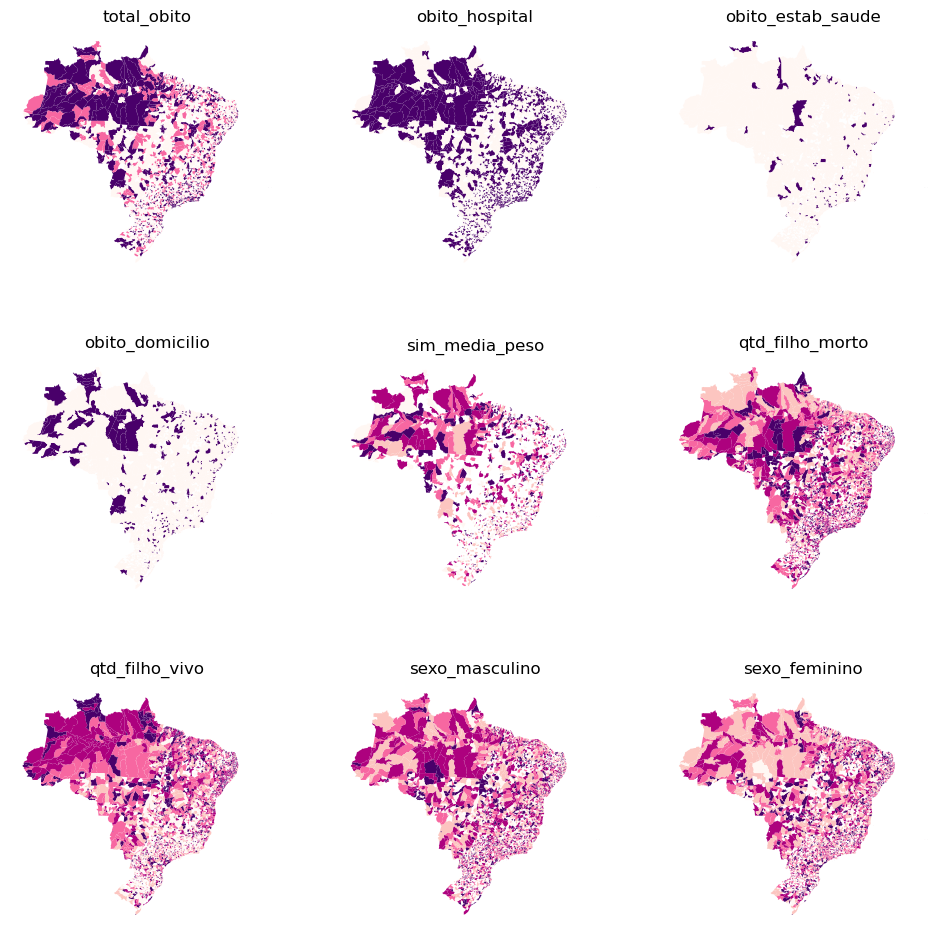

In [211]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    ax.set_axis_off()
    ax.set_title(col)
plt.show()

In [213]:
gdf = gdf.dropna(subset=['total_obito', 'total_nascimento'])

In [215]:
gdf

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry,CODMUN,total_obito,obito_hospital,obito_estab_saude,obito_domicilio,sim_media_peso,qtd_filho_morto,qtd_filho_vivo,sexo_masculino,sexo_feminino,gravidez_unica,gravidez_dupla,gravidez_tripla,esc_0,esc_1,esc_2,esc_3,esc_4,esc_5,parto_vaginal,parto_cesario,raca_branca,raca_preta,raca_amarela,raca_parda,raca_indigena,idade_mae,num_estabelecimentos,total_nascimento,nascimento_hospital,nascimento_estab_saude,nascimento_domicilio,media_consultas,sinasc_media_peso,kotelchuck_1,kotelchuck_2,kotelchuck_3,kotelchuck_4,kotelchuck_5,total_geral
0,110001,Alta Floresta D'Oeste,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,7067.127,"POLYGON ((-61.93075 -11.97349, -61.93234 -11.9...",110001,0.0,0.000000,0.00000,0.000000,NaN,0.228571,1.114286,0.771429,0.228571,1.000000,0.000000,0.000000,0.000000,0.057143,0.171429,0.514286,0.085714,0.142857,0.285714,0.714286,0.200000,0.000000,0.000000,0.628571,0.142857,26.657143,2.0,35.0,1.000000,0.000000,0.000000,8.200000,3209.000000,0.000000,0.142857,0.114286,0.057143,0.657143,35.0
1,110002,Ariquemes,110002,Ariquemes,1101,Porto Velho,11,Rondônia,1,Norte,None,None,4426.143,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",110002,13.0,1.000000,0.00000,0.000000,2089.846154,0.253521,0.919454,0.525088,0.474912,0.981954,0.018046,0.000000,0.000880,0.020687,0.201144,0.518486,0.065581,0.193222,0.272447,0.727553,0.241197,0.066021,0.011884,0.678697,0.000880,26.423415,8.0,2259.0,0.998229,0.000885,0.000000,8.689243,3219.460381,0.000443,0.142541,0.041169,0.068172,0.746791,2272.0
3,110004,Cacoal,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,3793.000,"POLYGON ((-61.00075 -11.25298, -61.0008 -11.29...",110004,4.0,1.000000,0.00000,0.000000,2174.250000,0.242713,0.837838,0.516163,0.483837,0.984632,0.015368,0.000000,0.002120,0.025967,0.154743,0.439322,0.075252,0.302597,0.204028,0.795443,0.314785,0.056174,0.005299,0.577107,0.045045,27.403816,5.0,1883.0,0.989910,0.009559,0.000531,9.102509,3206.366968,0.000000,0.097716,0.049389,0.063197,0.777483,1887.0
4,110005,Cerejeiras,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,2783.297,"POLYGON ((-60.82068 -13.11944, -60.81773 -13.1...",110005,0.0,0.000000,0.00000,0.000000,NaN,0.294574,1.100775,0.573643,0.426357,1.000000,0.000000,0.000000,0.000000,0.007752,0.186047,0.573643,0.038760,0.193798,0.062016,0.937984,0.403101,0.038760,0.000000,0.542636,0.000000,26.232558,1.0,129.0,0.992248,0.000000,0.000000,8.914729,3358.124031,0.000000,0.116279,0.007752,0.023256,0.852713,129.0
5,110006,Colorado do Oeste,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,1451.063,"POLYGON ((-60.41495 -13.04076, -60.41445 -13.0...",110006,0.0,0.000000,0.00000,0.000000,NaN,0.000000,1.400000,0.600000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.200000,0.000000,0.600000,0.000000,24.200000,1.0,5.0,0.400000,0.000000,0.000000,10.000000,3176.000000,0.000000,0.200000,0.000000,0.000000,0.800000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,522190,Varjão,520001,Goiânia,5201,Goiânia,52,Goiás,5,Centro-oeste,None,None,517.402,"POLYGON ((-49.67954 -17.14333, -49.67957 -17.1...",522190,0.0,0.000000,0.00000,0.000000,NaN,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.0,1.0,0.000000,1.000000,0.000000,4.000000,3200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
5567,522200,Vianópolis,520002,Anápolis,5201,Goiânia,52,Goiás,5,Centro-oeste,None,None,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...",522200,0.0,0.000000,0.00000,0.000000,NaN,0.247863,1.136752,0.4957

### GWR para brasil com a variavel alvo: total obito

In [217]:
import geopandas as gpd
import pandas as pd
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap
from libpysal.weights import Queen


In [245]:
gdf['centroid'] = gdf.geometry.centroid
gdf['X'] = gdf.centroid.x
gdf['Y'] = gdf.centroid.y

y = gdf['total_obito'].values.reshape((-1,1))

X = gdf[['total_nascimento', 'kotelchuck_1','kotelchuck_2','kotelchuck_3', 'kotelchuck_4', 'kotelchuck_5']].values


/var/folders/5p/kzljp9_d39g5r9ykrbtrg00m0000gn/T/ipykernel_62925/2451294324.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
/var/folders/5p/kzljp9_d39g5r9ykrbtrg00m0000gn/T/ipykernel_62925/2451294324.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['X'] = gdf.centroid.x
/var/folders/5p/kzljp9_d39g5r9ykrbtrg00m0000gn/T/ipykernel_62925/2451294324.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['Y'] = gdf.centroid.y


In [247]:
coords = list(zip(gdf['X'], gdf['Y']))

# seleciona a largura de banda ótima para o kernel espacial
selector = Sel_BW(coords, y, X)
bw = selector.search()
print(f"Largura de banda escolhida: {bw}")


Largura de banda escolhida: 99.0


In [249]:
gwr_model = GWR(coords, y, X, bw)
gwr_results = gwr_model.fit()

print(gwr_results.summary())


Model type                                                         Gaussian
Number of observations:                                                3848
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                         519606.034
Log-likelihood:                                                  -14898.291
AIC:                                                              29810.582
AICc:                                                             29812.619
BIC:                                                             487897.393
R2:                                                                   0.907
Adj. R2:                                                              0.907

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [251]:
# Extrair os betas locais
betas = gwr_results.params

# Adiciona os betas no GeoDataFrame
gdf.loc[:, 'beta_intercepto'] = betas[:, 0]
gdf.loc[:, 'beta_total_nascimento'] = betas[:, 1]
gdf.loc[:, 'beta_kotelchuck_1'] = betas[:, 2]
gdf.loc[:, 'beta_kotelchuck_2'] = betas[:, 3]
gdf.loc[:, 'beta_kotelchuck_3'] = betas[:, 4]
gdf.loc[:, 'beta_kotelchuck_4'] = betas[:, 5]
gdf.loc[:, 'beta_kotelchuck_5'] = betas[:, 6]

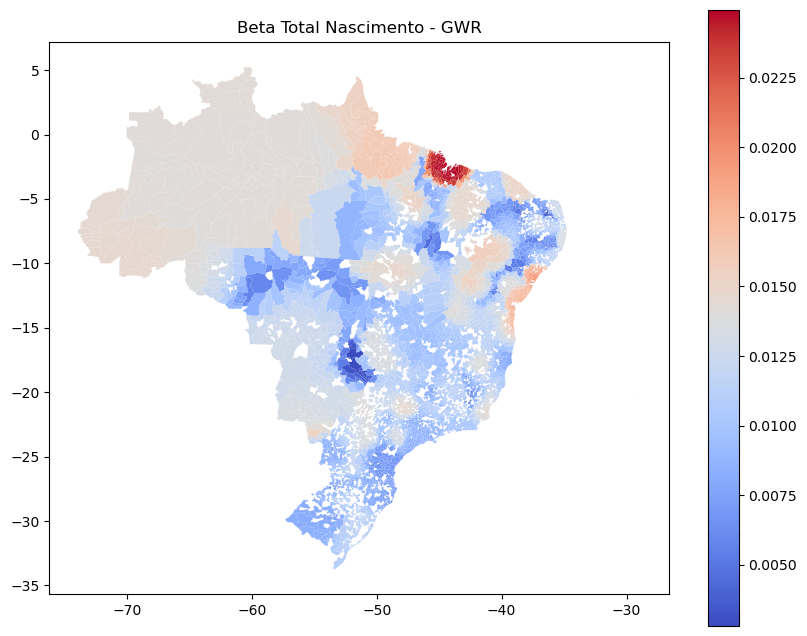

In [253]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='beta_total_nascimento', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('Beta Total Nascimento - GWR')
plt.show()


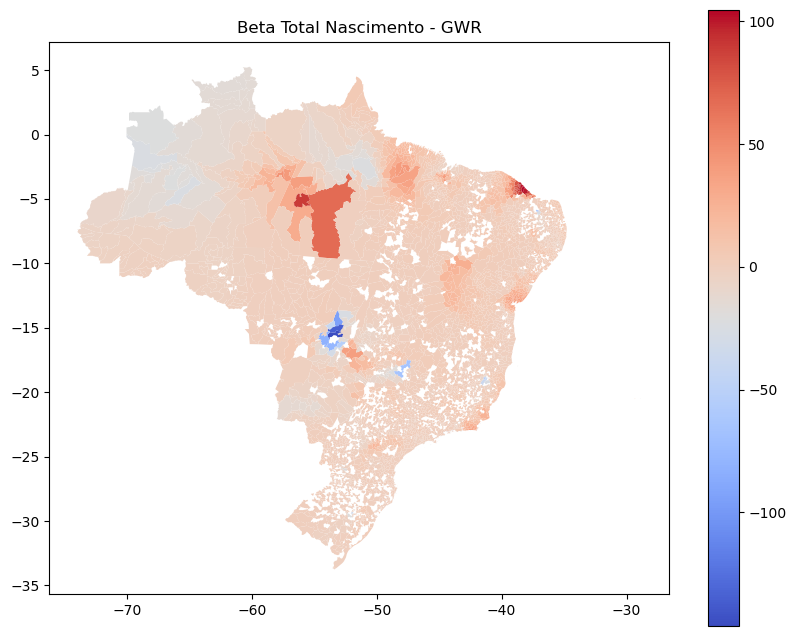

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='beta_kotelchuck_1', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('Beta Total Nascimento - GWR')
plt.show()

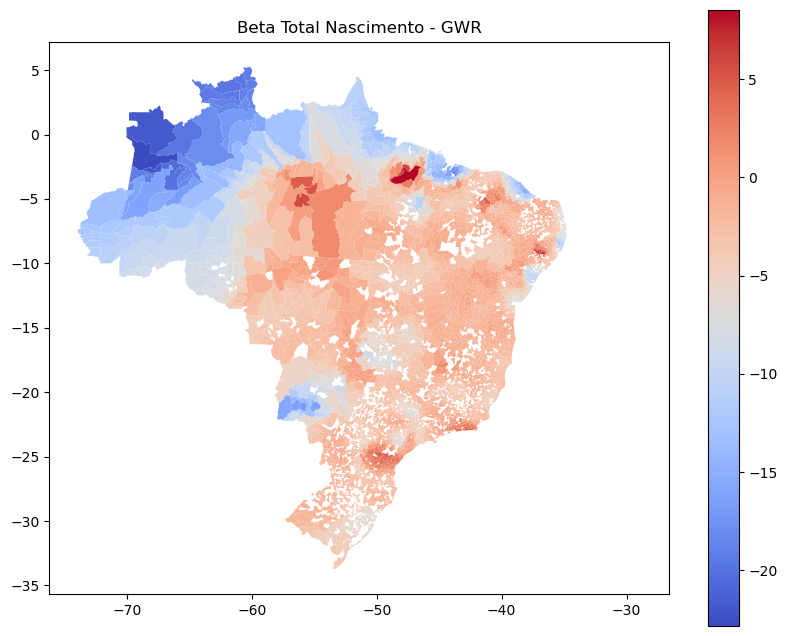

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='beta_kotelchuck_5', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('Beta Total Nascimento - GWR')
plt.show()